Homework 2 
Task 1 

Name: Ritesh Puttanmadam

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



Question 1 : Preprocess your Titanic training data;

In [1]:
# we loading the data and pre processing it also print it so we know if its reading the csv file
trainingdata_train = pd.read_csv("train.csv")
print(trainingdata_train.columns.values)

NameError: name 'pd' is not defined

In [ ]:
# here we are dropping the irrelevent columns because of not used for training purposes  
trainingdata_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# we here filling the missing values for Age 
trainingdata_train["Age"] = trainingdata_train["Age"].fillna(trainingdata_train["Age"].median())
# we here filling the missing values for Embarked
trainingdata_train["Embarked"] = trainingdata_train["Embarked"].fillna(trainingdata_train["Embarked"].mode()[0])

# here we are encoding the catogorial features
label_encoding_sex = LabelEncoder()
# we here do the same for Embarked
label_encoding_Embarked = LabelEncoder()
# here we train the data and add it back to the loaded data 
trainingdata_train["Sex"] = label_encoding_sex.fit_transform(trainingdata_train["Sex"])
# we here train the data again for Embarked and load it back to the data loaded 
trainingdata_train["Embarked"] = label_encoding_Embarked.fit_transform(trainingdata_train["Embarked"])

# here we want to seperate the data so we not combining them with what we target for and what we get
X = trainingdata_train.drop("Survived", axis=1)
# we return the data for Y axis 
y = trainingdata_train["Survived"]

Question 2: (5 points ) Learn and fine-tune a decision tree model with the Titanic training data, plot
your decision tree; 

In [ ]:
# here we are setting the tree parameters for max_depth, min samples and criterion 
treeparameters = {"max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10], "criterion": ["gini", "entropy"] }
# we are setting the decisiontree for a random state of 42 braches 
decisiontree = DecisionTreeClassifier(random_state=42)
# we are definig the axis for decision tree 
x_y_axis_DT = GridSearchCV(decisiontree, treeparameters, cv=5, scoring='accuracy')
# setting it to x and y axis to say to be fit 
x_y_axis_DT.fit(X, y)
# we set the axis and call it to calling_DT
calling_DT = x_y_axis_DT.best_estimator_


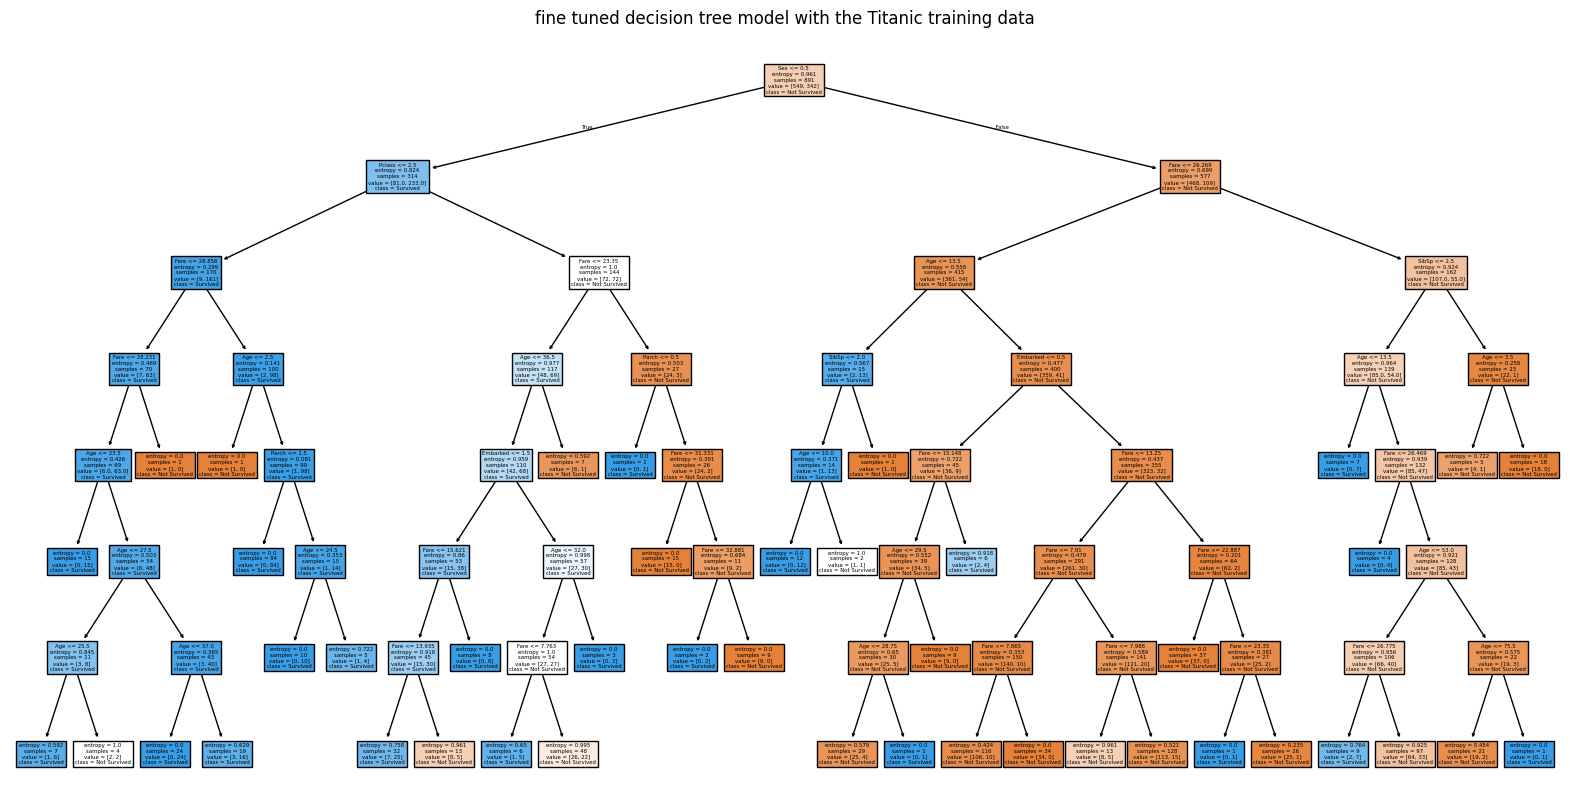

In [ ]:
# Decision Tree customization 
plt.figure(figsize=(20, 10))
plot_tree(calling_DT, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
# title 
plt.title("fine tuned decision tree model with the Titanic training data")
# display the Decision Tree
plt.show()

Question 3: (5 points) Apply the five-fold cross validation of your fine-tuned decision tree learning
model to the Titanic training data to extract average classification accuracy;

In [ ]:
# here we are calling the decision tree model so we get the exact things we need 
decisiontree_score_5Foldcross = cross_val_score(calling_DT, X, y, cv=5, scoring="accuracy")
# we printing it here after the values are saved and called in float numbers
print(f"Decision Tree five-fold cross validation average is: {decisiontree_score_5Foldcross.mean():.4f}")


Decision Tree five-fold cross validation average is: 0.8193


Question 4: (5 points) Apply the five-fold cross validation of your fine-tuned random forest learning
model to the Titanic training data to extract average classification accuracy;

In [ ]:
# first here we getting the random forest from the tree above 
random_forest_modelcall = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
# here we are calling the random forest tree model so we get the exact things we need 
randomforest_score_5Foldcross = cross_val_score(random_forest_modelcall, X, y, cv=5, scoring="accuracy")
# we printing it here after the values are saved and called in float numbers 
print(f"Random Forest five-fold cross validation average is: {randomforest_score_5Foldcross.mean():.4f}")


Random Forest five-fold cross validation average is: 0.8216


Question 5: (5 points) Which algorithm is better, Decision Tree or Random Forest? What are your
observations and conclusions from the algorithm comparison and analysis?

## Conclusion

Decision Tree Accuracy: 0.8193 = 81.93%

Random Forest Accuracy: 0.8216 = 82.16%

Therefore by looking at the averages above, Random Forest is better than Decision Tree. 